# Directed Graph Component Visualization

This notebook visualizes components as **DIRECTED graphs** with:
- ✓ Arrows showing edge direction
- ✓ Different colors for different relation types
- ✓ Edge labels showing relation names
- ✓ One component at a time for clarity

**Important:** This treats the graph as directed, preserving the direction of all relationships.

## Configuration

In [1]:
# Set your file path
FILEPATH = "train.txt"  # ← CHANGE THIS!

## Import Libraries

In [2]:
from collections import defaultdict, deque
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

try:
    import networkx as nx
    print("✓ NetworkX available")
except ImportError:
    print("❌ Please install: pip install networkx")
    
print("✓ Libraries imported")

✓ NetworkX available
✓ Libraries imported


## Load Graph Data

In [3]:
def load_graph(filepath):
    """Load graph data preserving direction and relation types"""
    edges = []
    
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line and not line.startswith('#'):
                parts = line.split()
                if len(parts) >= 3:
                    source = parts[0]
                    relation = parts[1]
                    target = parts[2]
                    edges.append((source, relation, target))
    
    return edges

edges = load_graph(FILEPATH)
print(f"✓ Loaded {len(edges):,} directed edges")

✓ Loaded 13,821 directed edges


## Find Weakly Connected Components

We find components by treating the graph as undirected temporarily (to identify connected groups), but preserve the directed edges for visualization.

In [4]:
def find_weakly_connected_components(edges):
    """Find weakly connected components"""
    # Build undirected graph for component detection
    undirected_graph = defaultdict(set)
    all_entities = set()
    
    for source, relation, target in edges:
        undirected_graph[source].add(target)
        undirected_graph[target].add(source)
        all_entities.add(source)
        all_entities.add(target)
    
    # Find components using BFS
    visited = set()
    components = []
    
    for start_entity in all_entities:
        if start_entity in visited:
            continue
        
        component = set()
        queue = deque([start_entity])
        
        while queue:
            entity = queue.popleft()
            
            if entity in visited:
                continue
            
            visited.add(entity)
            component.add(entity)
            
            for neighbor in undirected_graph[entity]:
                if neighbor not in visited:
                    queue.append(neighbor)
        
        components.append(component)
    
    return sorted(components, key=len, reverse=True)

components = find_weakly_connected_components(edges)
print(f"✓ Found {len(components):,} components")
print(f"  Largest: {len(components[0]):,} nodes")
print(f"  Smallest: {len(components[-1]):,} nodes")

✓ Found 50 components
  Largest: 27 nodes
  Smallest: 26 nodes


## Helper Function: Get Component Edges

In [7]:
def get_component_edges(component, edges):
    """Get all directed edges within a component, grouped by relation type"""
    component_edges = defaultdict(list)
    
    for source, relation, target in edges:
        if source in component and target in component:
            component_edges[relation].append((source, target))
    
    return component_edges

## Visualize Single Component (Directed)

**Choose which component to visualize:**

Component #1
Nodes: 27
Edges: 305
Relation types: 26

Relation breakdown:
  granddaughterOf: 22 edges
  grandmotherOf: 19 edges
  grandfatherOf: 19 edges
  greatGranddaughterOf: 18 edges
  sisterOf: 17 edges
  motherOf: 17 edges
  fatherOf: 17 edges
  nieceOf: 17 edges
  grandsonOf: 16 edges
  auntOf: 15 edges
  greatGrandmotherOf: 13 edges
  girlCousinOf: 13 edges
  greatGrandfatherOf: 13 edges
  brotherOf: 11 edges
  greatAuntOf: 9 edges
  daughterOf: 9 edges
  uncleOf: 9 edges
  sonOf: 8 edges
  greatGrandsonOf: 8 edges
  boyCousinOf: 7 edges
  nephewOf: 7 edges
  boyFirstCousinOnceRemovedOf: 6 edges
  secondAuntOf: 6 edges
  girlFirstCousinOnceRemovedOf: 3 edges
  greatUncleOf: 3 edges
  secondUncleOf: 3 edges


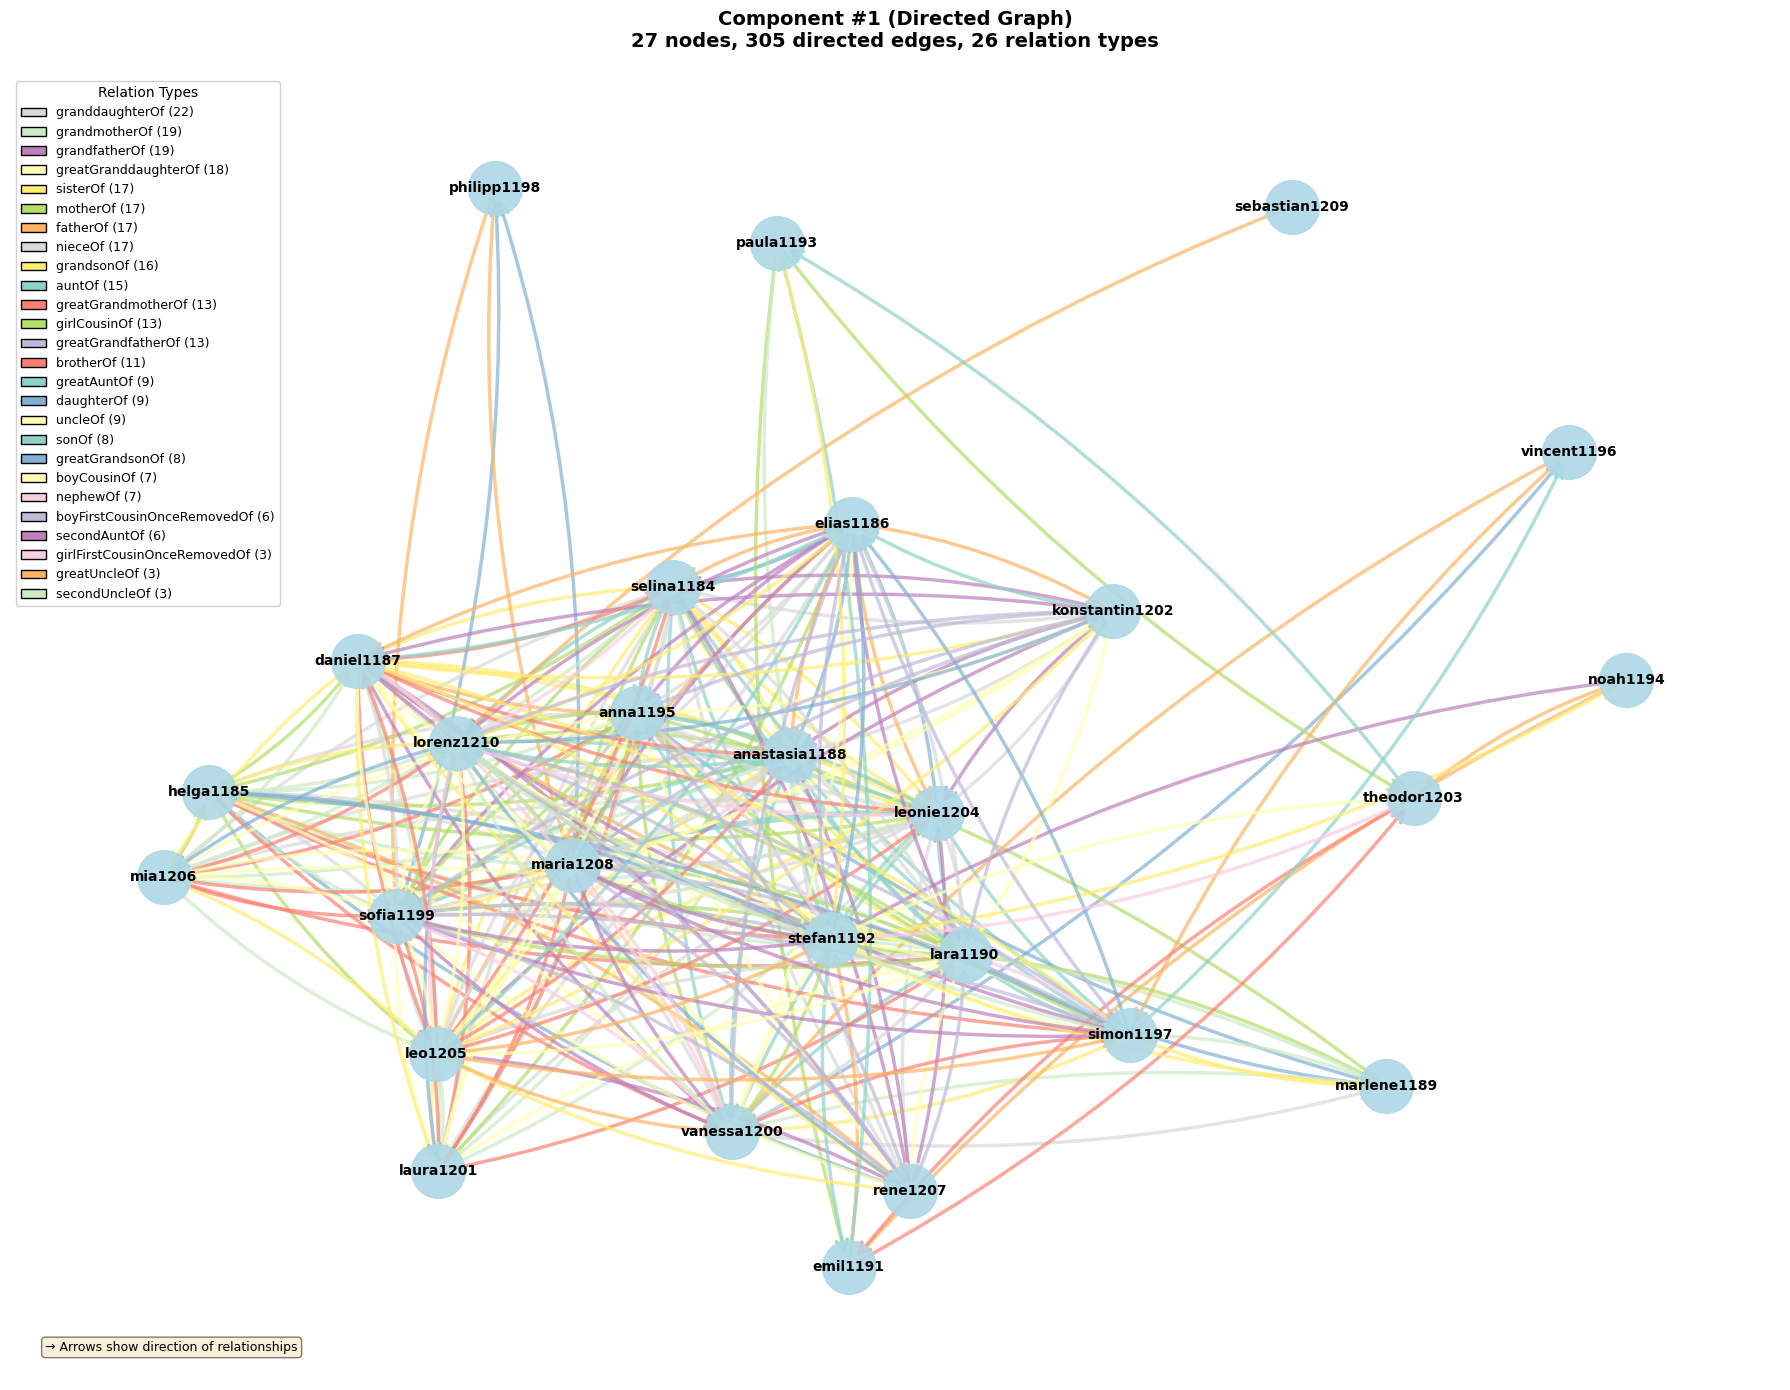

In [8]:
# ← CHANGE THIS to visualize different components
COMPONENT_TO_VISUALIZE = 1

if 1 <= COMPONENT_TO_VISUALIZE <= len(components):
    component = components[COMPONENT_TO_VISUALIZE - 1]
    
    # Get edges grouped by relation type
    component_edges_by_type = get_component_edges(component, edges)
    
    # Create directed graph
    G = nx.DiGraph()
    
    for relation, edge_list in component_edges_by_type.items():
        for source, target in edge_list:
            G.add_edge(source, target, relation=relation)
    
    # Print statistics
    total_edges = sum(len(edges) for edges in component_edges_by_type.values())
    
    print(f"Component #{COMPONENT_TO_VISUALIZE}")
    print("="*60)
    print(f"Nodes: {len(component)}")
    print(f"Edges: {total_edges}")
    print(f"Relation types: {len(component_edges_by_type)}")
    print(f"\nRelation breakdown:")
    for relation, edge_list in sorted(component_edges_by_type.items(), 
                                     key=lambda x: len(x[1]), reverse=True):
        print(f"  {relation}: {len(edge_list)} edges")
    
    # Choose visualization parameters
    if len(component) <= 10:
        figsize = (14, 10)
        node_size = 2000
        font_size = 11
        arrow_size = 25
    elif len(component) <= 30:
        figsize = (18, 14)
        node_size = 1500
        font_size = 10
        arrow_size = 20
    elif len(component) <= 100:
        figsize = (22, 18)
        node_size = 800
        font_size = 8
        arrow_size = 15
    else:
        figsize = (26, 22)
        node_size = 400
        font_size = 6
        arrow_size = 10
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Layout
    if len(component) <= 20:
        pos = nx.spring_layout(G, k=3, iterations=100, seed=42)
    elif len(component) <= 50:
        pos = nx.spring_layout(G, k=2, iterations=50, seed=42)
    else:
        pos = nx.spring_layout(G, k=1.5, iterations=30, seed=42)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, 
                          node_color='lightblue',
                          node_size=node_size,
                          alpha=0.9,
                          ax=ax)
    
    # Assign colors to relation types
    relation_colors = {}
    colors = plt.cm.Set3.colors
    for idx, relation in enumerate(sorted(component_edges_by_type.keys())):
        relation_colors[relation] = colors[idx % len(colors)]
    
    # Draw edges by relation type with different colors
    for relation, edge_list in component_edges_by_type.items():
        nx.draw_networkx_edges(
            G, pos,
            edgelist=edge_list,
            edge_color=[relation_colors[relation]] * len(edge_list),
            width=2.5,
            alpha=0.7,
            arrows=True,
            arrowsize=arrow_size,
            arrowstyle='->',
            connectionstyle='arc3,rad=0.1',
            ax=ax
        )
    
    # Draw node labels
    if len(component) <= 100:
        nx.draw_networkx_labels(G, pos, 
                               font_size=font_size,
                               font_weight='bold',
                               ax=ax)
    
    # Draw edge labels (only for small components)
    if len(component) <= 25:
        edge_labels = {}
        for source, relation, target in edges:
            if source in component and target in component:
                if (source, target) in edge_labels:
                    edge_labels[(source, target)] += f", {relation}"
                else:
                    edge_labels[(source, target)] = relation
        
        nx.draw_networkx_edge_labels(
            G, pos,
            edge_labels=edge_labels,
            font_size=max(6, font_size - 2),
            font_color='darkgreen',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7),
            ax=ax
        )
    
    # Create legend
    legend_elements = [
        mpatches.Patch(facecolor=relation_colors[relation], 
                      edgecolor='black',
                      label=f'{relation} ({len(edge_list)})')
        for relation, edge_list in sorted(component_edges_by_type.items(),
                                         key=lambda x: len(x[1]), reverse=True)
    ]
    
    ax.legend(handles=legend_elements, 
             loc='upper left',
             fontsize=max(8, font_size - 1),
             title='Relation Types',
             framealpha=0.9)
    
    # Title
    title = f'Component #{COMPONENT_TO_VISUALIZE} (Directed Graph)\n'
    title += f'{len(component)} nodes, {total_edges} directed edges, '
    title += f'{len(component_edges_by_type)} relation types'
    plt.title(title, fontsize=14, fontweight='bold', pad=20)
    
    # Note about arrows
    plt.text(0.02, 0.02, '→ Arrows show direction of relationships',
            transform=ax.transAxes,
            fontsize=9,
            verticalalignment='bottom',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    ax.axis('off')
    plt.tight_layout()
    plt.show()
    
else:
    print(f"Invalid component number. Choose between 1 and {len(components)}")

## Visualize Multiple Components

Loop through multiple components:


Visualizing Component #1
Nodes: 27, Edges: 305, Relations: 26


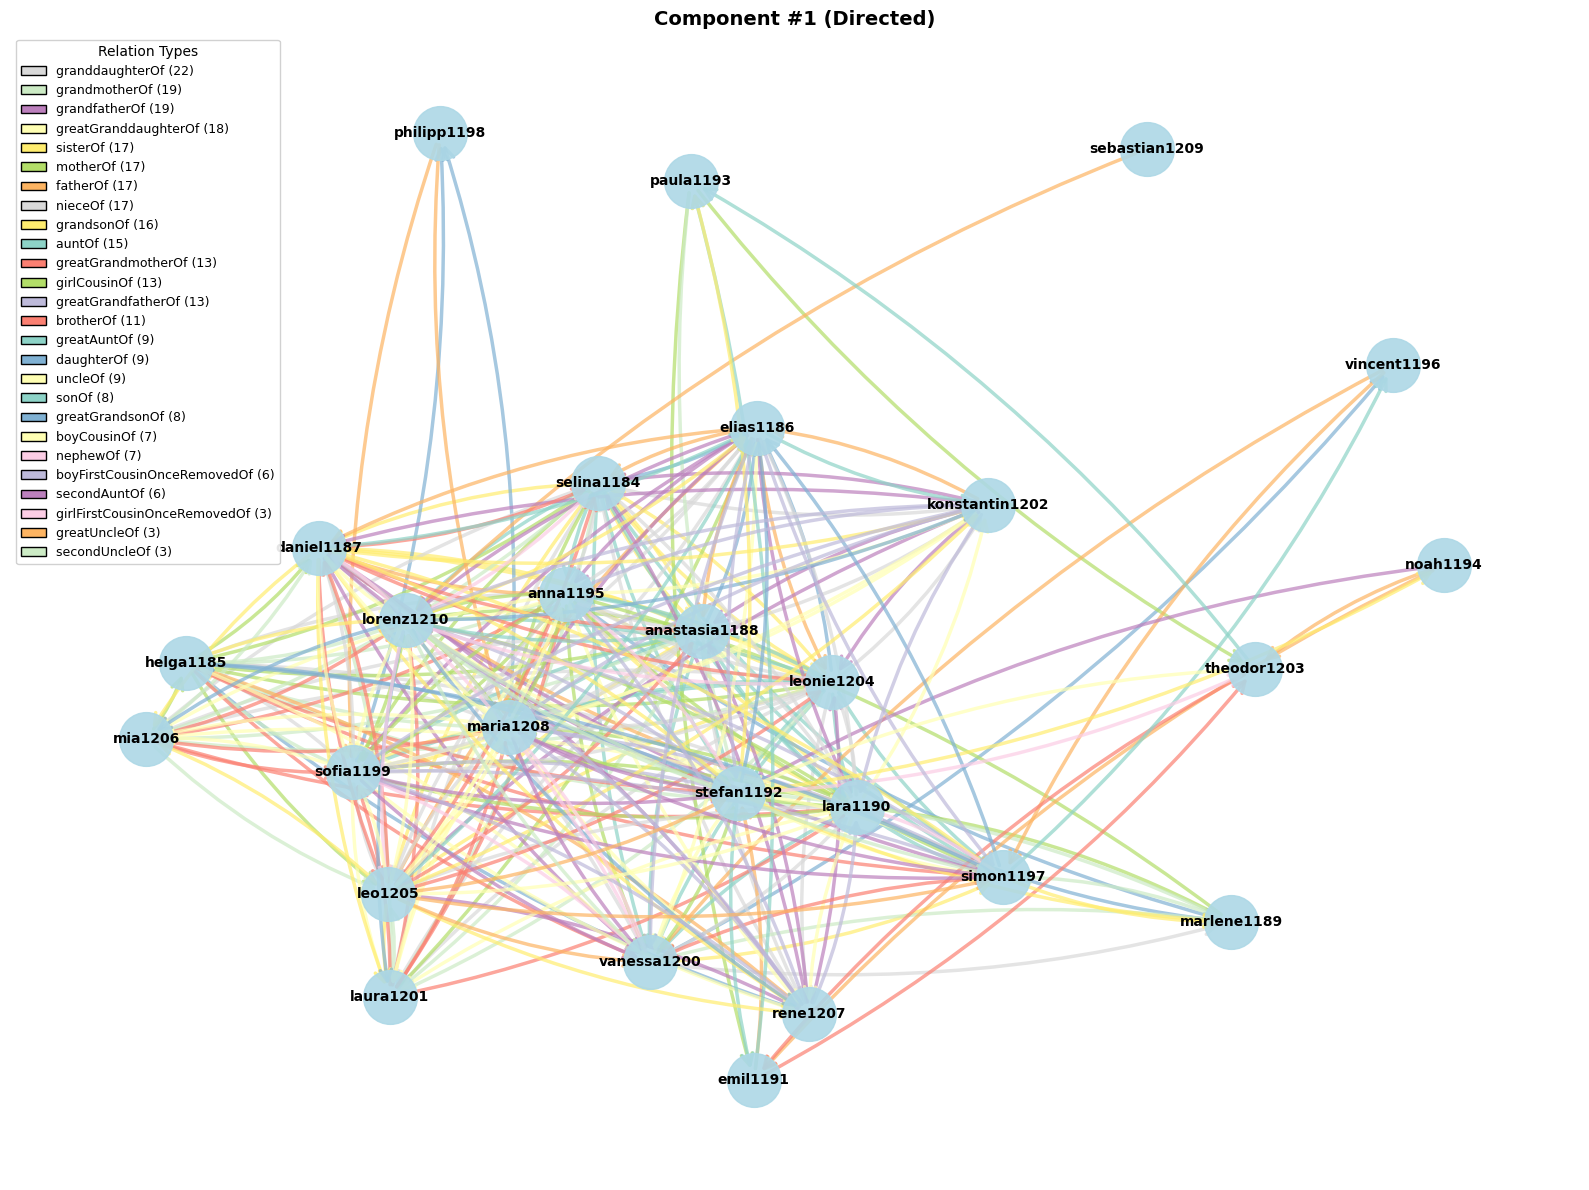


Visualizing Component #2
Nodes: 27, Edges: 278, Relations: 28


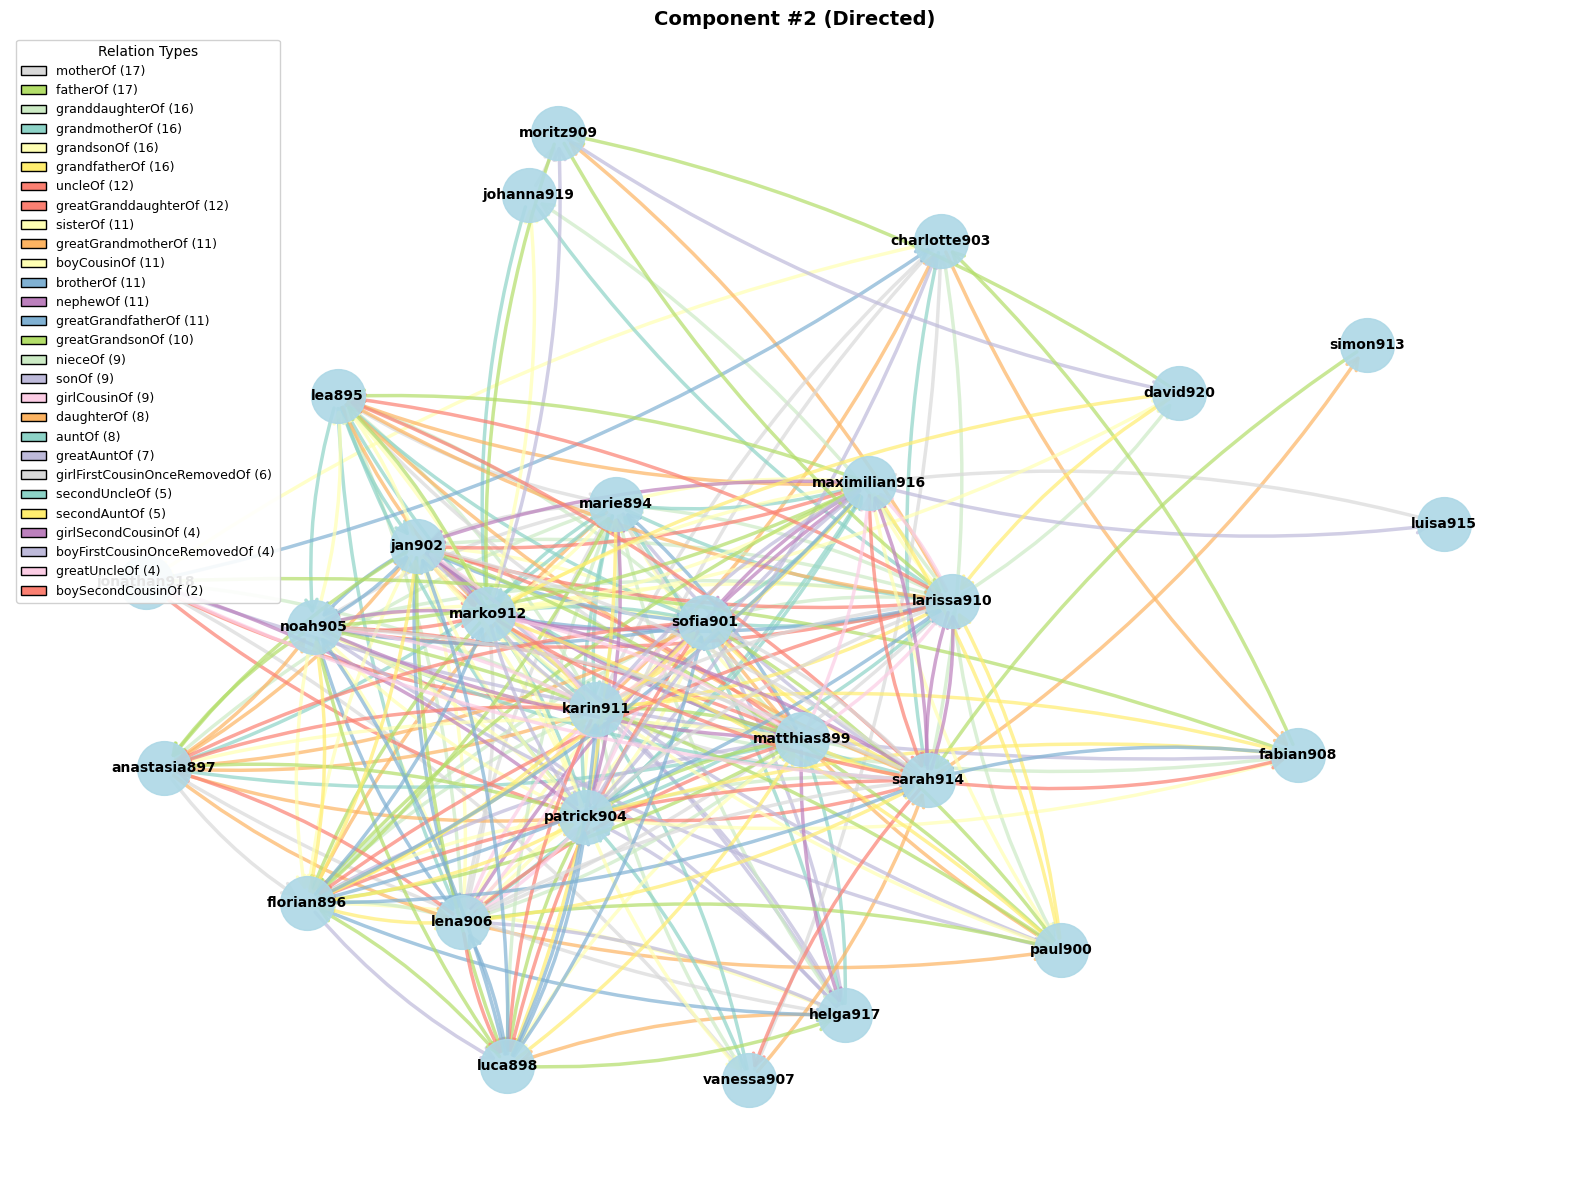


Visualizing Component #3
Nodes: 27, Edges: 271, Relations: 20


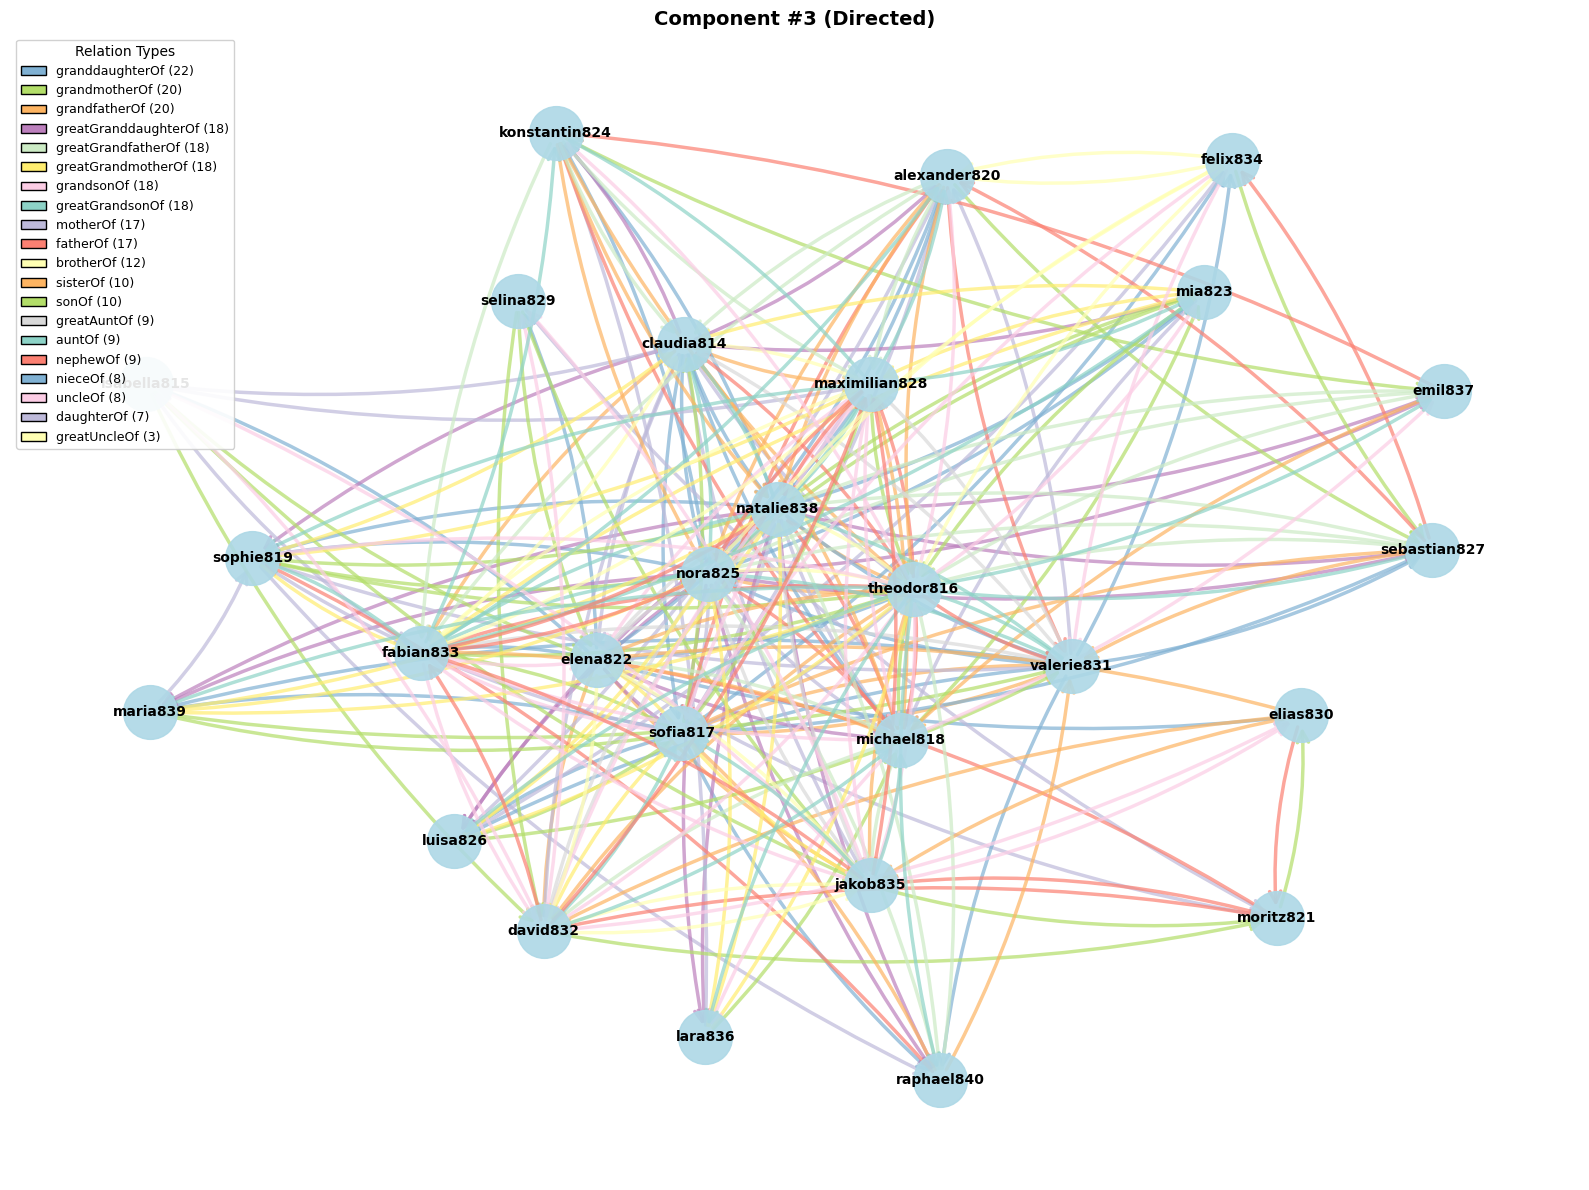


Visualizing Component #4
Nodes: 27, Edges: 236, Relations: 24


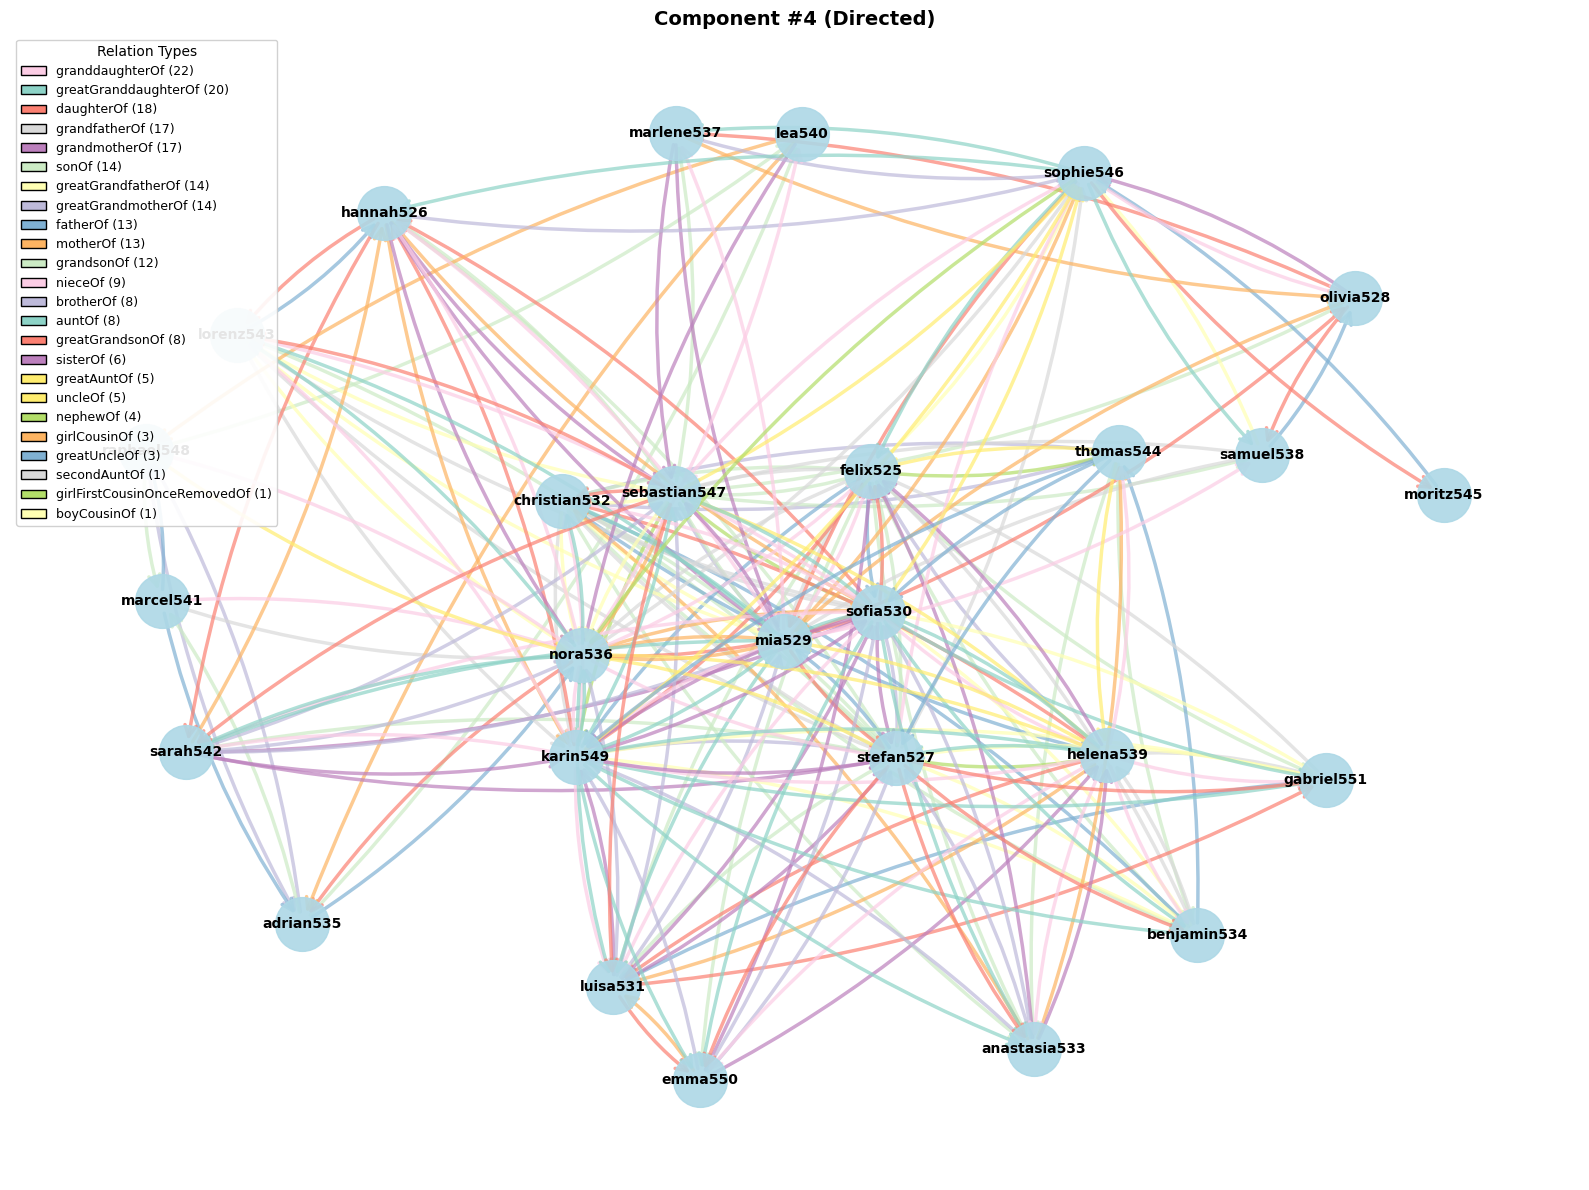


Visualizing Component #5
Nodes: 27, Edges: 252, Relations: 28


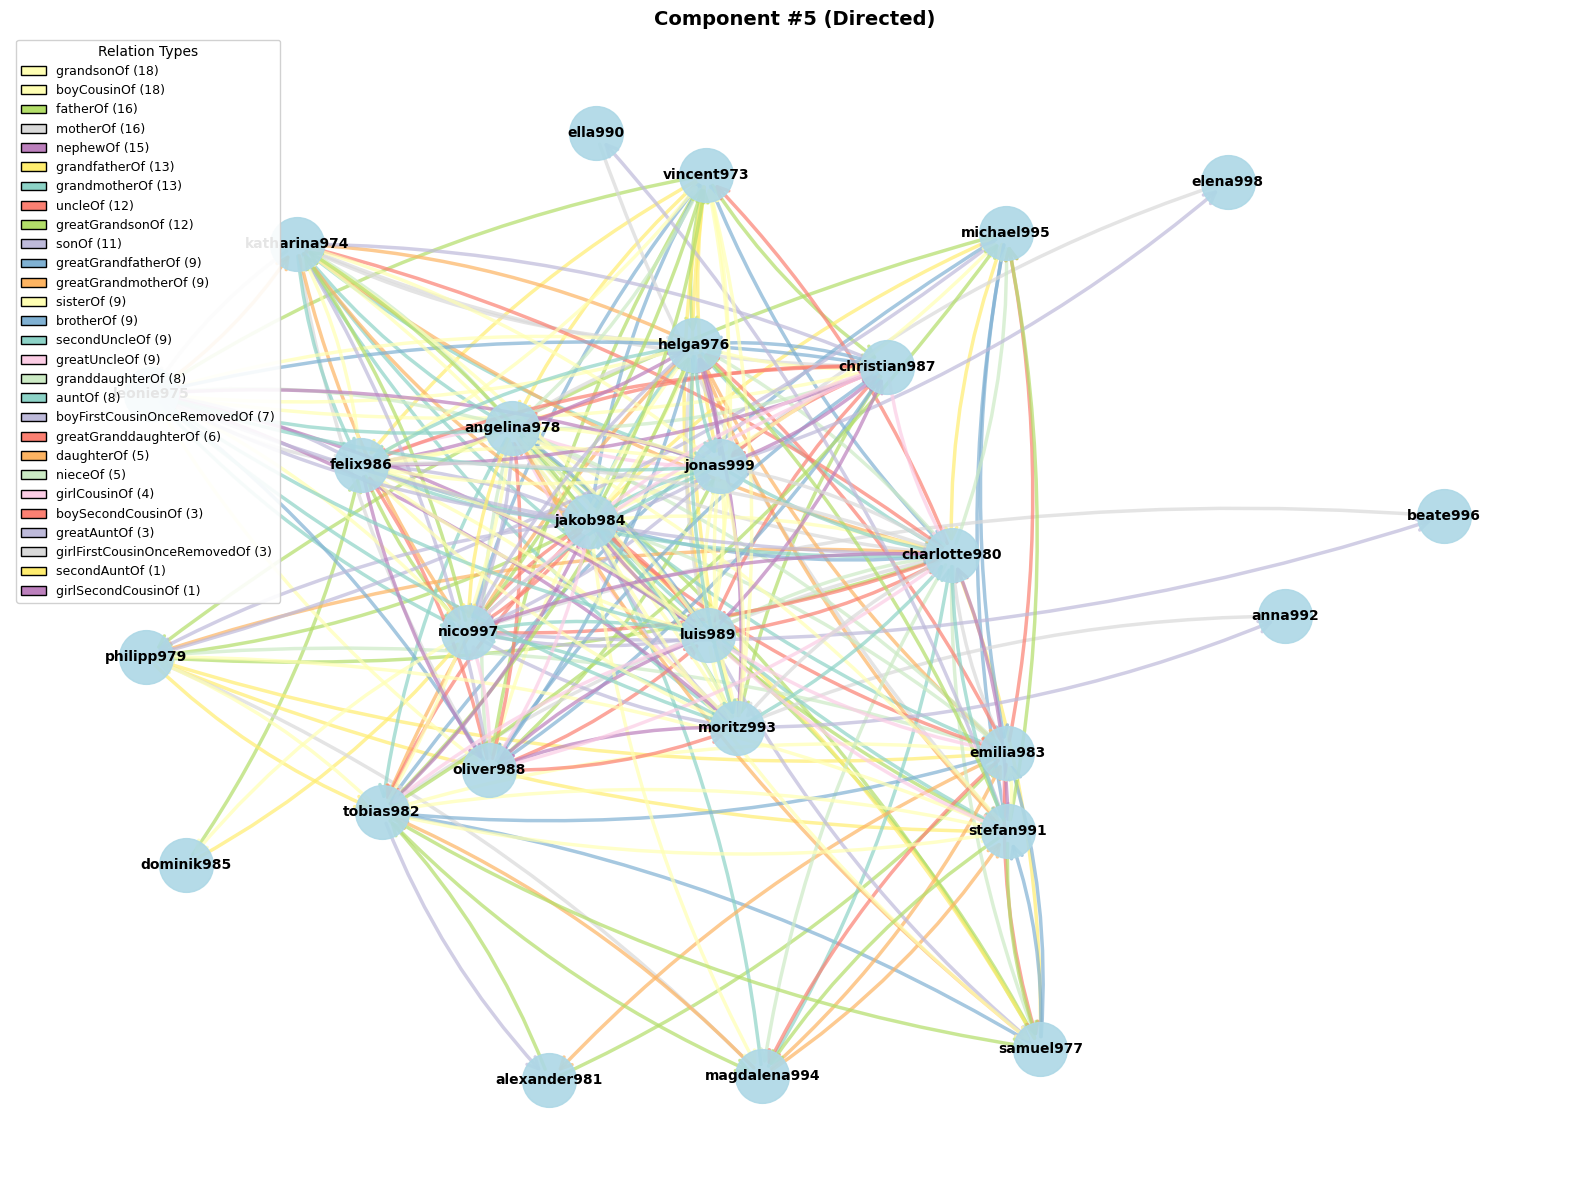

In [9]:
# How many components to visualize
NUM_COMPONENTS_TO_SHOW = 5  # ← Change this

for comp_id in range(1, min(NUM_COMPONENTS_TO_SHOW + 1, len(components) + 1)):
    print(f"\n{'='*80}")
    print(f"Visualizing Component #{comp_id}")
    print(f"{'='*80}")
    
    component = components[comp_id - 1]
    component_edges_by_type = get_component_edges(component, edges)
    
    # Create graph
    G = nx.DiGraph()
    for relation, edge_list in component_edges_by_type.items():
        for source, target in edge_list:
            G.add_edge(source, target, relation=relation)
    
    # Statistics
    total_edges = sum(len(edges) for edges in component_edges_by_type.values())
    print(f"Nodes: {len(component)}, Edges: {total_edges}, Relations: {len(component_edges_by_type)}")
    
    # Visualize
    figsize = (16, 12) if len(component) <= 30 else (20, 16)
    node_size = 1500 if len(component) <= 30 else 800
    font_size = 10 if len(component) <= 30 else 8
    
    fig, ax = plt.subplots(figsize=figsize)
    pos = nx.spring_layout(G, k=2, iterations=50, seed=42)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                          node_size=node_size, alpha=0.9, ax=ax)
    
    # Colors for relations
    relation_colors = {}
    colors = plt.cm.Set3.colors
    for idx, relation in enumerate(sorted(component_edges_by_type.keys())):
        relation_colors[relation] = colors[idx % len(colors)]
    
    # Draw edges
    for relation, edge_list in component_edges_by_type.items():
        nx.draw_networkx_edges(G, pos, edgelist=edge_list,
                              edge_color=[relation_colors[relation]] * len(edge_list),
                              width=2.5, alpha=0.7, arrows=True, arrowsize=20,
                              arrowstyle='->', connectionstyle='arc3,rad=0.1', ax=ax)
    
    # Labels
    if len(component) <= 50:
        nx.draw_networkx_labels(G, pos, font_size=font_size, font_weight='bold', ax=ax)
    
    # Legend
    legend_elements = [
        mpatches.Patch(facecolor=relation_colors[relation], edgecolor='black',
                      label=f'{relation} ({len(edge_list)})')
        for relation, edge_list in sorted(component_edges_by_type.items(),
                                         key=lambda x: len(x[1]), reverse=True)
    ]
    ax.legend(handles=legend_elements, loc='upper left', fontsize=9,
             title='Relation Types', framealpha=0.9)
    
    plt.title(f'Component #{comp_id} (Directed)', fontsize=14, fontweight='bold')
    ax.axis('off')
    plt.tight_layout()
    plt.show()
    plt.close()

## Component Comparison View

Compare specific components side-by-side:

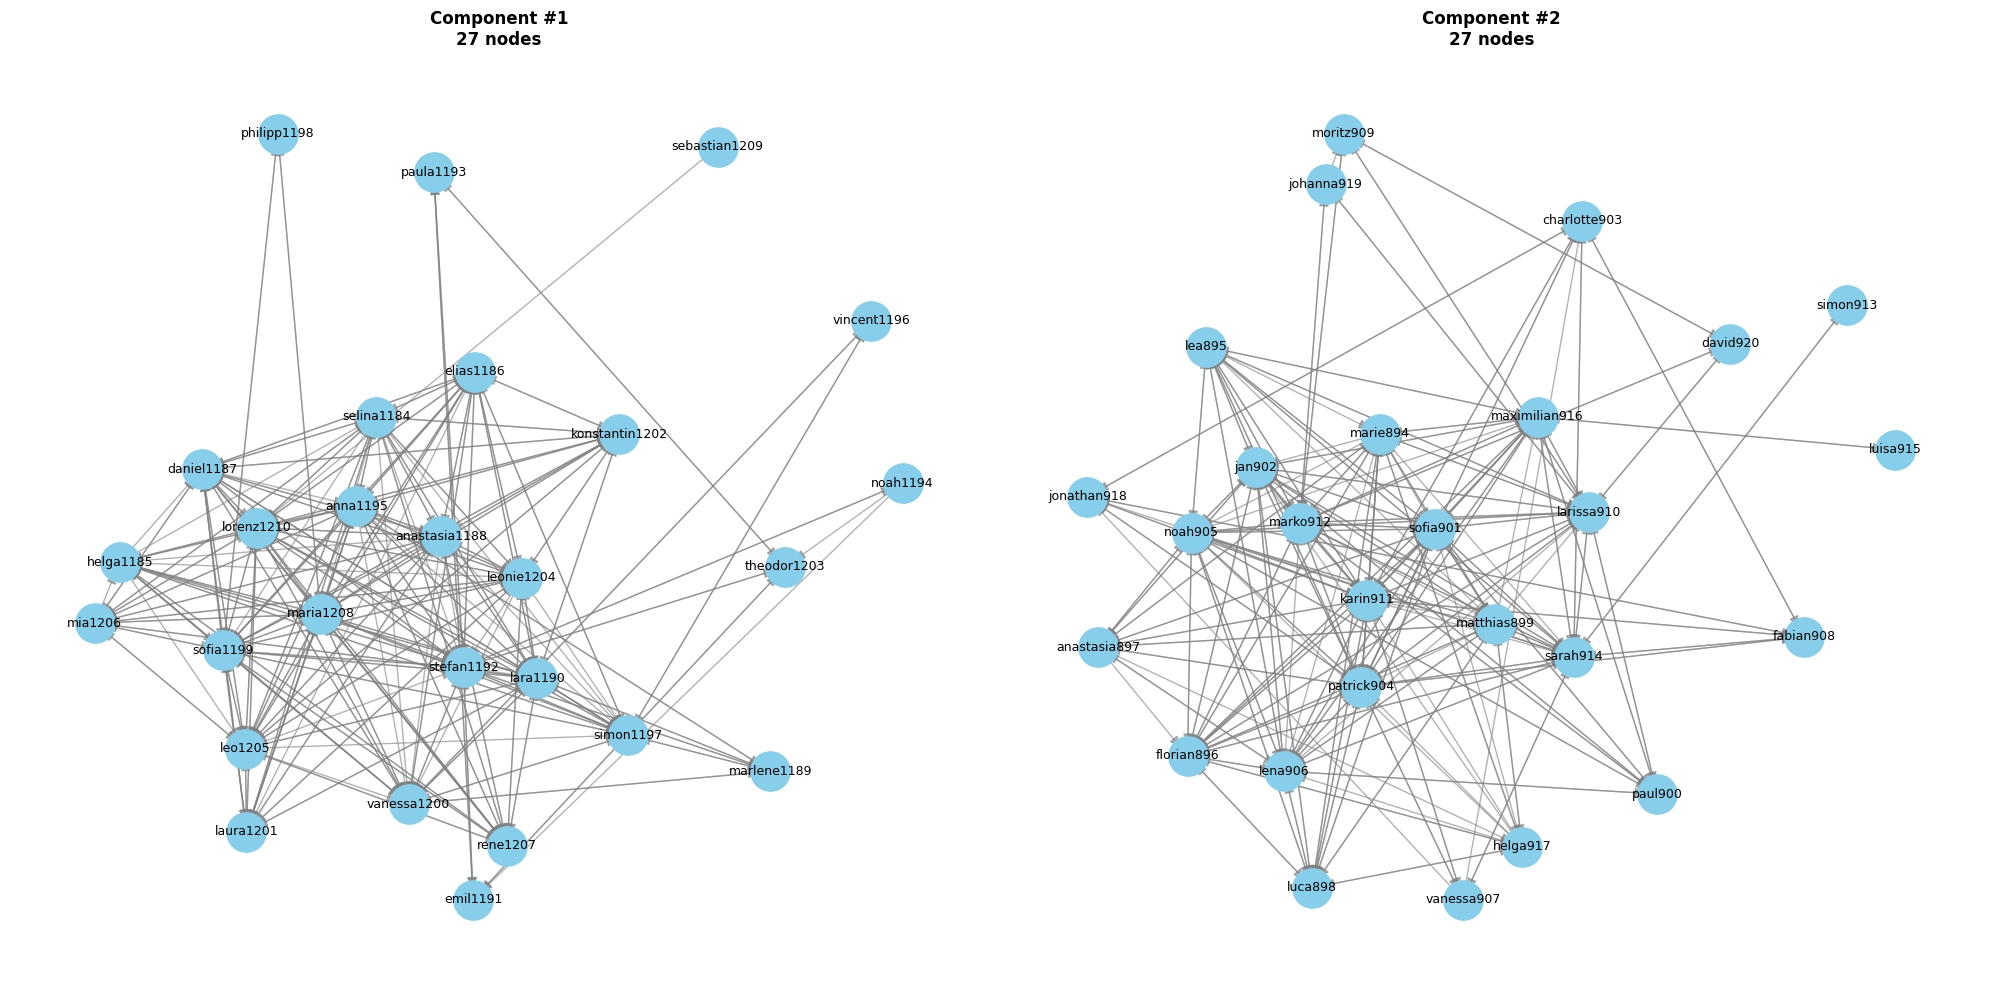

In [10]:
# Choose components to compare
COMPONENTS_TO_COMPARE = [1, 2]  # ← Change these

valid_comps = [c for c in COMPONENTS_TO_COMPARE if 1 <= c <= len(components)]

if valid_comps:
    n = len(valid_comps)
    fig, axes = plt.subplots(1, n, figsize=(10*n, 10))
    if n == 1:
        axes = [axes]
    
    for idx, comp_id in enumerate(valid_comps):
        ax = axes[idx]
        component = components[comp_id - 1]
        component_edges_by_type = get_component_edges(component, edges)
        
        G = nx.DiGraph()
        for relation, edge_list in component_edges_by_type.items():
            for source, target in edge_list:
                G.add_edge(source, target)
        
        pos = nx.spring_layout(G, k=2, iterations=50, seed=42)
        
        nx.draw_networkx_nodes(G, pos, node_color='skyblue', 
                              node_size=800, ax=ax)
        nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.6,
                              arrows=True, arrowsize=15, ax=ax)
        
        if len(component) <= 30:
            nx.draw_networkx_labels(G, pos, font_size=9, ax=ax)
        
        ax.set_title(f'Component #{comp_id}\n{len(component)} nodes', 
                    fontsize=12, fontweight='bold')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

## Save Visualizations

In [ ]:
# Save top N components
NUM_TO_SAVE = 5  # ← Change this

print(f"Saving top {NUM_TO_SAVE} components...\n")

for comp_id in range(1, min(NUM_TO_SAVE + 1, len(components) + 1)):
    component = components[comp_id - 1]
    component_edges_by_type = get_component_edges(component, edges)
    
    G = nx.DiGraph()
    for relation, edge_list in component_edges_by_type.items():
        for source, target in edge_list:
            G.add_edge(source, target, relation=relation)
    
    fig, ax = plt.subplots(figsize=(16, 12))
    pos = nx.spring_layout(G, k=2, iterations=50, seed=42)
    
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                          node_size=1000, alpha=0.9, ax=ax)
    
    # Colors
    relation_colors = {}
    colors = plt.cm.Set3.colors
    for idx, relation in enumerate(sorted(component_edges_by_type.keys())):
        relation_colors[relation] = colors[idx % len(colors)]
    
    # Draw edges
    for relation, edge_list in component_edges_by_type.items():
        nx.draw_networkx_edges(G, pos, edgelist=edge_list,
                              edge_color=[relation_colors[relation]] * len(edge_list),
                              width=2.5, alpha=0.7, arrows=True, arrowsize=20,
                              arrowstyle='->', ax=ax)
    
    if len(component) <= 50:
        nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold', ax=ax)
    
    plt.title(f'Component #{comp_id} (Directed)', fontsize=14, fontweight='bold')
    ax.axis('off')
    
    filename = f'component_{comp_id}_directed.png'
    plt.savefig(filename, dpi=200, bbox_inches='tight')
    plt.close()
    
    print(f"✓ Saved: {filename}")

print(f"\n✓ Saved {NUM_TO_SAVE} visualizations")